In [1]:
import hist
import correctionlib
from coffea.util import load
import pocket_coffea
from pocket_coffea.utils.plot_utils import *
from pocket_coffea.parameters.custom.pt_reweighting.pt_reweighting import pt_corrections

basefolder = pocket_coffea.__path__[0]

/work/mmarcheg/PocketCoffea/pocket_coffea/utils/plot_utils.py:95: RuntimeWarning: invalid value encountered in true_divide
  ratio = num / den
/work/mmarcheg/PocketCoffea/pocket_coffea/utils/plot_utils.py:98: RuntimeWarning: invalid value encountered in true_divide
  unc = np.sqrt(num) / den
/work/mmarcheg/PocketCoffea/pocket_coffea/utils/plot_utils.py:160: RuntimeWarning: invalid value encountered in true_divide
  up = up / nom
/work/mmarcheg/PocketCoffea/pocket_coffea/utils/plot_utils.py:161: RuntimeWarning: invalid value encountered in true_divide
  down = down / nom


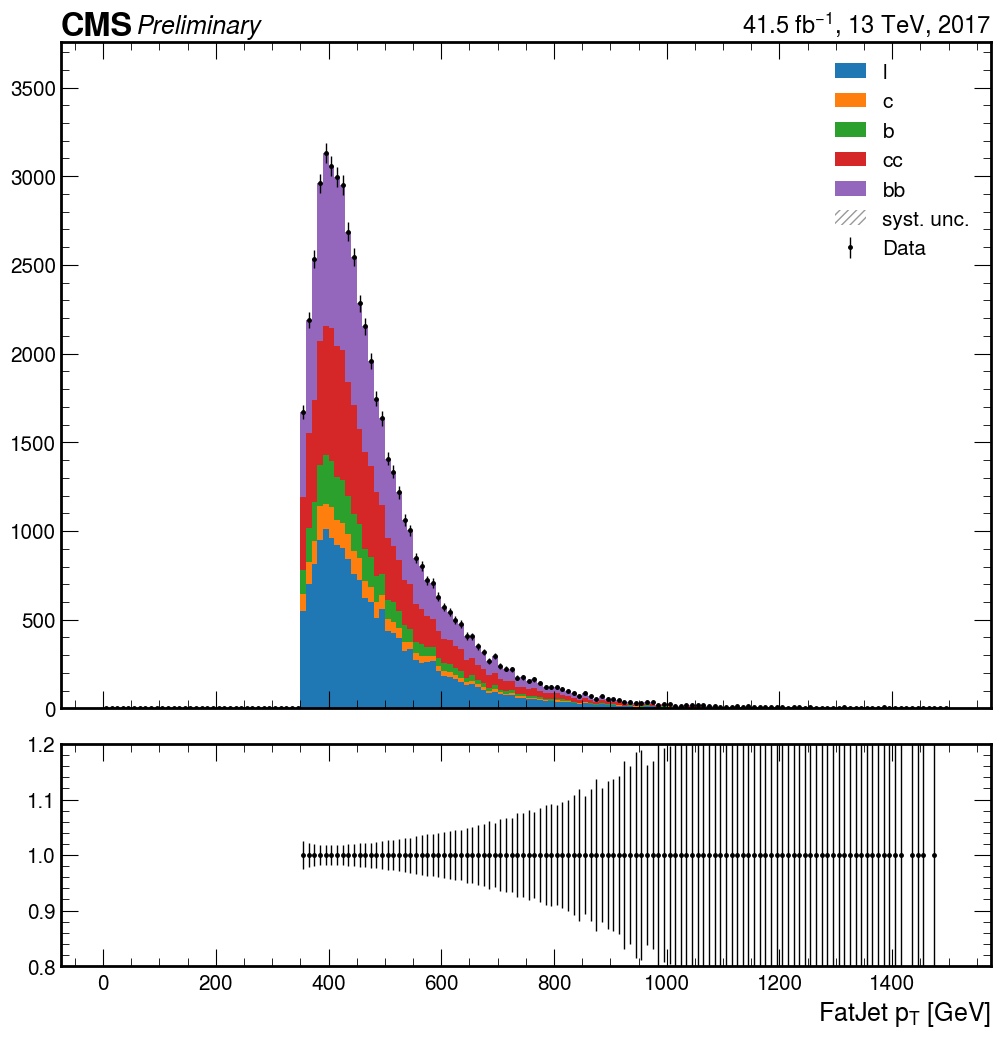

In [2]:
cat = 'pt350msd40'
def reweighting_function(pt):
    return pt_corr.evaluate(cat, pt)
#for year in ['2018', '2017', '2016_PostVFP']:
for year in ['2017']:
    corrfile = pt_corrections[year]
    folder = '/'.join(corrfile.split('/')[:-1])
    outfile = os.path.join(folder, "output_{dataset}.coffea")
    o = load(outfile)
    cset = correctionlib.CorrectionSet.from_file(corrfile)
    pt_corr = cset[f'pt_corr_{year}']
    histname = 'FatJetGood_pt_1'
    h = o['variables'][histname]
    plot_data_mc_hist1D(h, histname, only_cat=cat, save=False, reweighting_function=reweighting_function)
    #plot_data_mc_hist1D(h, histname, only_cat=cat, save=False)

In [5]:
values = h['l'][{'year': '2018', 'cat': 'pt350msd40', 'variation': 'nominal'}].values()
values

KeyError: 'l'

In [ ]:
myhist = h['l'][{'year': '2018', 'cat': 'pt350msd40', 'variation': 'nominal'}]
myhist

In [ ]:
histo = hist.Hist(myhist.axes[0])
histo.fill(myhist.centers, pt_corr)

In [ ]:
s = hist.Stack.from_dict({'test' : histo, 'prova' : histo})
s

In [ ]:
for item in s:
    print(s)

In [ ]:
s[0]

In [ ]:
len(s)